# **The Sparks Foundation - GRIPMARCH21**

**Name: Jeet Santosh Nimbhorkar**

**Task 1 - Prediction using Supervised ML**

In [ ]:
#importing the necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn import metrics

The data set given in the form of a .csv file is read and the first 10 data points are printed -

In [112]:
df=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv");

print(f"The dataset contains {len(df)} datapoints.")
print("First 10 datapoints:")
df.head(10)

The dataset contains 25 datapoints.
First 10 datapoints:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Display the statistical data of the dataframe using the pd.Dataframe.describe() function -

In [113]:
print("Statistical data about the data set :")
df.describe()

Statistical data about the data set :


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The datapoints are visualized using a scatter plot. A graph is displayed with the help of the matplotlib library. This is done to find any possible relation in the data.

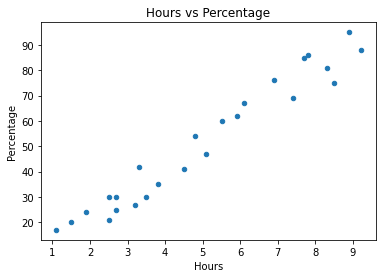

In [114]:
df.plot(x='Hours', y='Scores',kind='scatter') 
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

In [26]:
#find the correlation between the number of hours and the scores 

corr=np.corrcoef(df['Hours'], df['Scores'])[0,1]
print(f"The correlation between the two vaiables is {corr}.")

The correlation between the two vaiables is 0.9761906560220887.


**The correlation is close to +1, which indicates that both the variables move in the same direction almost together.**

**Preparing the test and train data -**

In [77]:
x=df.iloc[:, :-1].values #indicates the "Hours" column
y=df.iloc[:, 1].values   #indicates the "Scores" column

Splitting the data into training and testing. 80% of the data is taken for training.

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

**Training the model**

Linear Regression is used for training and prediction -

In [102]:
reg = LinearRegression()  
reg.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [103]:
#b0 represents the regression line's slope
b0=reg.coef_
print(f"Slope of the line is {b0}.")

Slope of the line is [9.91065648].


In [104]:
#b1 represents the regression line's intercept
b1=reg.intercept_
print(f"Intercept of the line is {b1}.")

Intercept of the line is 2.0181600414346974.


The equation of the regression line is given as y=b0*x + b1

This line is plotted

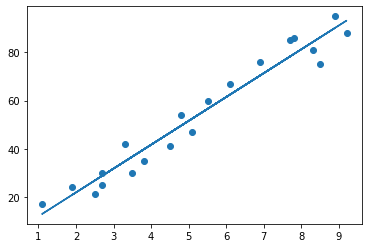

In [105]:
reg_line = b0*x_train+b1

plt.scatter(x_train,y_train)
plt.plot(x_train, reg_line);
plt.show()

**Prediction**

The predictions are made for the test data and they are compared with the actual values(y_test)

In [106]:
y_pred = reg.predict(x_test)

In [107]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df_pred

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


For a given value of x=9.25 hours, the score is predicted using the LinearRegression.predict() function. 
It is important to note that this function takes a 2-D array as a parameter. 

In [109]:
hours = 9.25
print(f"Number of Hours = {hours}")
pred = reg.predict([[hours]])
print(f"Predicted Score for {hours} is {pred[0]}.")

Number of Hours = 9.25
Predicted Score for 9.25 is 93.69173248737535.


**Model Evaluation**

A bar graph is plotted to visualize the difference between the actual and predicted values.

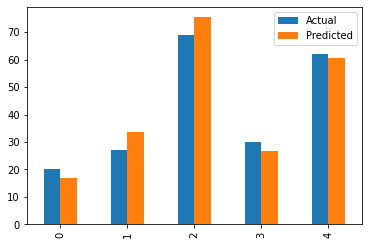

In [110]:
df_pred.plot(kind='bar')

The model is evaluated based on the three evaluation metrices for regression, namely, mean absolute erro, mean squared error and root mean squared error. 

In [111]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 4.647447612100367
